# Bitacora para el manejo de secuencias ensambladas y búsqueda con *Blastn*

## Para el siguiente ejercicio es necesario tener el Blast+ instalado en la computadora
https://www.ncbi.nlm.nih.gov/guide/data-software/

## Se utilizarán los contigs formados por el ensamblaje que se localizan en 
`~/Desktop/data/ejercicio_ensamblaje/8_S356_contigs.fa`

In [22]:
from pandas import Series, DataFrame
import pandas as pd
from Bio import SeqIO, AlignIO, SeqRecord
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
import matplotlib.pyplot as plt 

In [23]:
cd ~/Desktop/data/ejercicio_ensamblaje/

/home/user1/Desktop/data/ejercicio_ensamblaje


In [3]:
ls 

8_S356_contigs.fa          8_S356_contigs_blastx.tab         trinity/
8_S356_contigs.tab         8_S356_contigs_blastx_goslim.csv
8_S356_contigs_blastn.csv  img/


In [4]:
!grep ">" 8_S356_contigs.fa |wc -l

321


# se analizarán con blastx los contigs obtenidos

In [ ]:
%%bash
export BLASTDB=/home/user1/DATA/nt/

date  
time blastn -query 8_S356_contigs.fa  -db /home/user1/DATA/nt/nt \
-out 8_S356_contigs.tab -evalue 1E-6 -max_target_seqs 1 \
-num_threads 2 -outfmt "6 std sskingdoms stitle staxids sscinames scomnames sblastnames" 
date

In [21]:
!date

Fri Aug  3 13:00:26 UTC 2018


In [ ]:
!head -2 8_S356_contigs.tab

In [24]:
encabezado =("qseqid", "sseqid", "pident", "length", "mismatch", "gapopen","qstart", 
             "qend", "sstart","send", "evalue", "bitscore", "sskingdoms", "stitle", 
             "staxids", "sscinames", "scomnames", "sblastnames")

In [25]:
ftab=pd.read_table("8_S356_contigs.tab", header=None , names= encabezado)
ftab.head()

qseqid          sseqid  pident  length  mismatch  gapopen  \
0  8_S356_contig000005  XR_001415659.1  90.385      52         5        0   
1  8_S356_contig000008  XR_001428184.1  95.522     134         6        0   
2  8_S356_contig000013  XM_004569909.4  78.676     136        19        7   
3  8_S356_contig000014  XR_002665540.1  88.690     168        18        1   
4  8_S356_contig000015      CP026258.1  89.394     264        21        5   

   qstart  qend    sstart      send        evalue  bitscore sskingdoms  \
0     311   362       885       834  1.160000e-07      69.4  Eukaryota   
1      74   207        52       185  5.430000e-52     215.0  Eukaryota   
2      85   212        78       211  2.720000e-11      82.4  Eukaryota   
3     190   357       781       615  1.930000e-48     204.0  Eukaryota   
4      70   326  13254129  13253866  3.560000e-85     326.0  Eukaryota   

                                              stitle staxids  \
0  PREDICTED: Poecilia mexicana uncharacterized L...   48701   
1  PREDICTED: Poecilia latipinna uncharacterized ...   48699   
2  PREDICTED: Maylandia zebra F-box protein 34 (f...  106582   
3  PREDICTED: Seriola dumerili uncharacterized LO...   41447   
4                 Scophthalmus maximus chromosome 16   52904   

              sscinames          scomnames  sblastnames  
0     Poecilia mexicana  Poecilia mexicana  bony fishes  
1    Poecilia latipinna      sailfin molly  bony fishes  
2       Maylandia zebra        zebra mbuna  bony fishes  
3      Seriola dumerili  greater amberjack  bony fishes  
4  Scophthalmus maximus             turbot  bony fishes

In [26]:
len(ftab)

242

In [27]:
ftab1= ftab.groupby("sskingdoms")["qseqid"].count()
ftab1 = DataFrame(ftab1)
ftab1

qseqid
sskingdoms        
Eukaryota      242

# Cuántos contigs no son eucariotas?

## Guadardo la base de datos en formato csv

In [28]:
ftab.to_csv("8_S356_contigs_blastn.csv", header=True, index= None)

### en caso de haber el hecho el análisis previo y querer recuperar el archivo anterior 

In [29]:
ftab= pd.read_csv("8_S356_contigs_blastn.csv")
ftab.head(2)

qseqid          sseqid  pident  length  mismatch  gapopen  \
0  8_S356_contig000005  XR_001415659.1  90.385      52         5        0   
1  8_S356_contig000008  XR_001428184.1  95.522     134         6        0   

   qstart  qend  sstart  send        evalue  bitscore sskingdoms  \
0     311   362     885   834  1.160000e-07      69.4  Eukaryota   
1      74   207      52   185  5.430000e-52     215.0  Eukaryota   

                                              stitle staxids  \
0  PREDICTED: Poecilia mexicana uncharacterized L...   48701   
1  PREDICTED: Poecilia latipinna uncharacterized ...   48699   

            sscinames          scomnames  sblastnames  
0   Poecilia mexicana  Poecilia mexicana  bony fishes  
1  Poecilia latipinna      sailfin molly  bony fishes

# Hay algún contig con más de una asignación (duplicados)?

In [30]:
ftab1= ftab.groupby("qseqid")["qseqid"].count()
ftab1 = DataFrame(ftab1)
ftab1

qseqid
qseqid                     
8_S356_contig000005       1
8_S356_contig000008       1
8_S356_contig000013       1
8_S356_contig000014       1
8_S356_contig000015       3
8_S356_contig000016       1
8_S356_contig000017       1
8_S356_contig000018       1
8_S356_contig000020       1
8_S356_contig000021       1
8_S356_contig000022       1
8_S356_contig000023       1
8_S356_contig000024       1
8_S356_contig000025       1
8_S356_contig000026       1
8_S356_contig000027       2
8_S356_contig000028       1
8_S356_contig000033       1
8_S356_contig000034       1
8_S356_contig000035       1
8_S356_contig000036       1
8_S356_contig000037       1
8_S356_contig000038       1
8_S356_contig000039       1
8_S356_contig000040       1
8_S356_contig000041       1
8_S356_contig000042       1
8_S356_contig000044       1
8_S356_contig000046       1
8_S356_contig000047       1
...                     ...
8_S356_contig000251       1
8_S356_contig000252       1
8_S356_contig000253       1
8_S356_contig000254       3
8_S356_contig000255       1
8_S356_contig000258       1
8_S356_contig000266       1
8_S356_contig000272       1
8_S356_contig000274       1
8_S356_contig000275       2
8_S356_contig000278       1
8_S356_contig000281       1
8_S356_contig000283       1
8_S356_contig000284       1
8_S356_contig000287       1
8_S356_contig000291       1
8_S356_contig000292      25
8_S356_contig000295       1
8_S356_contig000296       1
8_S356_contig000297       1
8_S356_contig000301       1
8_S356_contig000303       1
8_S356_contig000307       1
8_S356_contig000308       1
8_S356_contig000309       1
8_S356_contig000313       1
8_S356_contig000314       1
8_S356_contig000315       1
8_S356_contig000320       1
8_S356_contig000321       1

[148 rows x 1 columns]

# Es necesario eliminar duplicados

In [31]:
ftab1 =ftab.drop_duplicates(subset = 'qseqid', keep='first', inplace = False)
ftab1

qseqid          sseqid  pident  length  mismatch  gapopen  \
0    8_S356_contig000005  XR_001415659.1  90.385      52         5        0   
1    8_S356_contig000008  XR_001428184.1  95.522     134         6        0   
2    8_S356_contig000013  XM_004569909.4  78.676     136        19        7   
3    8_S356_contig000014  XR_002665540.1  88.690     168        18        1   
4    8_S356_contig000015      CP026258.1  89.394     264        21        5   
7    8_S356_contig000016  XM_017411639.2  94.175     103         5        1   
8    8_S356_contig000017  XM_017411639.2  85.556     270        30        7   
9    8_S356_contig000018      AB649033.1  83.568     426        63        5   
10   8_S356_contig000020      AB601473.1  85.089     731       102        7   
11   8_S356_contig000021      AB601473.1  84.615     507        72        6   
12   8_S356_contig000022      AB601473.1  86.826     668        87        1   
13   8_S356_contig000023      AB601473.1  85.496     524        69        7   
14   8_S356_contig000024      LT972196.1  87.770     139        17        0   
15   8_S356_contig000025      JQ676168.1  89.958     239        18        1   
16   8_S356_contig000026      CP020799.1  80.769     104        12        7   
17   8_S356_contig000027      KX098545.1  92.733     344        20        3   
19   8_S356_contig000028  XM_020778772.1  88.095      84        10        0   
20   8_S356_contig000033  XM_015967717.1  81.522      92        10        5   
21   8_S356_contig000034      AB780552.1  88.520     662        68        4   
22   8_S356_contig000035      AB780552.1  88.114     631        66        5   
23   8_S356_contig000036      JX993748.1  89.130     138        11        4   
24   8_S356_contig000037      JX993748.1  89.781     137        11        3   
25   8_S356_contig000038      JX993748.1  89.781     137        11        3   
26   8_S356_contig000039      JX993748.1  89.781     137        11        3   
27   8_S356_contig000040      JX993748.1  89.781     137        11        3   
28   8_S356_contig000041      JX993748.1  89.781     137        11        3   
29   8_S356_contig000042      JX993748.1  89.781     137        11        3   
30   8_S356_contig000044  XM_005944092.1  92.857      56         4        0   
31   8_S356_contig000046      AB780551.1  94.366      71         4        0   
32   8_S356_contig000047      AB780553.1  89.474     342        36        0   
..                   ...             ...     ...     ...       ...      ...   
185  8_S356_contig000251      LN590691.1  88.732      71         8        0   
186  8_S356_contig000252      JX306953.1  97.924     289         6        0   
187  8_S356_contig000253  XM_005941944.2  89.787     235        23        1   
188  8_S356_contig000254      CP020799.1  87.728     383        42        5   
191  8_S356_contig000255  XM_019345319.1  91.935     186        13        2   
192  8_S356_contig000258  XM_005454536.3  82.171     129        18        4   
193  8_S356_contig000266  XM_013267727.2  86.567      67         8        1   
194  8_S356_contig000272      LN590969.1  91.803      61         5        0   
195  8_S356_contig000274      CP026253.1  95.455      44         2        0   
196  8_S356_contig000275      EU008541.1  87.838     222        27        0   
198  8_S356_contig000278  XR_002057775.1  97.436      39         1        0   
199  8_S356_contig000281      LN593564.1  83.190     232        34        1   
200  8_S356_contig000283      JF262086.1  80.198     101        13        4   
201  8_S356_contig000284  XM_005735654.1  93.617      47         3        0   
202  8_S356_contig000287  XM_003446966.4  87.692     130        16        0   
203  8_S356_contig000291  XM_005451386.3  92.562     121         8        1   
204  8_S356_contig000292      LN590695.1  93.857     293        17        1   
229  8_S356_contig000295      KF146044.1  88.593     263        21        8   
230  8_S356_contig000296  XM_019346557.1  88.028     142        13  

# Cuántos grupos hay a parte de peces?

In [32]:
ftab2= ftab1.groupby("sblastnames")["qseqid"].count()
ftab2 = DataFrame(ftab2)
ftab2

qseqid
sblastnames          
bony fishes       145
frogs & toads       2
lizards             1

In [33]:
ftab2= ftab1.groupby("sscinames")["qseqid"].count()
ftab2.sort_values(axis = 0, ascending=False, inplace=True)
ftab2

sscinames
Oreochromis niloticus                                                  34
Haplochromis chilotes                                                  15
Cyprinus carpio                                                        12
Haplochromis burtoni                                                   10
Oryzias latipes                                                         8
Symphysodon discus                                                      7
Scophthalmus maximus                                                    6
Maylandia zebra                                                         4
Austrofundulus limnaeus                                                 4
Neolamprologus brichardi                                                3
Dicentrarchus labrax                                                    3
Salmo salar                                                             3
Kryptolebias marmoratus                                                 3
Rana pipiens                

# procedimiento para simplificar tabla y graficar las 10 primeras categorías y el resto ponerlas en "otras"

In [34]:
linea10=ftab2[:10]
linea11=ftab2[10:]
#linea10
otro=sum (linea11)
#otro
otros = pd.DataFrame({0:otro}, index=["Other"])
otros
linea10=linea10.append(otros)
linea10

0
Oreochromis niloticus     34
Haplochromis chilotes     15
Cyprinus carpio           12
Haplochromis burtoni      10
Oryzias latipes            8
Symphysodon discus         7
Scophthalmus maximus       6
Maylandia zebra            4
Austrofundulus limnaeus    4
Neolamprologus brichardi   3
Other                     45

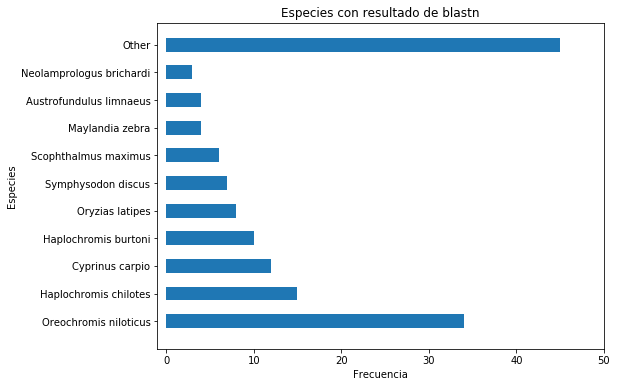

In [35]:
linea10.plot(kind='barh', figsize= (8,6))
plt.axis([-1, max(linea10[0])+5, -1, 10.8], label=None)
plt.legend().set_visible(False)
plt.xlabel("Frecuencia")
plt.ylabel("Especies")
plt.title("Especies con resultado de blastn")
plt.show()